In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [14]:
X,y = load_wine(return_X_y = True)
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [93]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [66]:
DT = DecisionTreeClassifier(criterion='entropy')
KNN = KNeighborsClassifier()
MultiNB = MultinomialNB()
GaussNB = GaussianNB()

In [76]:
params = {'n_neighbors':np.arange(1,32)}
KNNCV = GridSearchCV(KNN, param_grid = params, cv=5, return_train_score = True, n_jobs=-1)

In [81]:
KNNCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=1),
             n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])},
             return_train_score=True)

In [82]:
KNNCV.cv_results_

{'mean_fit_time': array([0.00279808, 0.00159888, 0.00139894, 0.00319858, 0.00179915,
        0.00299783, 0.00199885, 0.00159903, 0.00219893, 0.00159907,
        0.00239835, 0.00119939, 0.00159926, 0.00159917, 0.00179925,
        0.00159898, 0.00219874, 0.00099926, 0.00159907, 0.00119939,
        0.00199857, 0.00179901, 0.00139928, 0.00199876, 0.00139914,
        0.00179877, 0.00099959, 0.00219851, 0.00119915, 0.00259819,
        0.0019989 ]),
 'std_fit_time': array([1.16581147e-03, 4.90310423e-04, 4.89473229e-04, 1.16536988e-03,
        7.47640147e-04, 2.09630636e-03, 1.09475631e-03, 4.89745687e-04,
        3.99708787e-04, 4.89784651e-04, 2.33078880e-03, 3.99518223e-04,
        4.90037996e-04, 4.89765214e-04, 3.99899664e-04, 4.89512085e-04,
        3.99804382e-04, 3.50402318e-07, 4.89492632e-04, 3.99756471e-04,
        6.32108269e-04, 3.99899579e-04, 4.89395261e-04, 1.54837317e-03,
        4.89512062e-04, 3.99899522e-04, 2.43140197e-07, 9.79510894e-04,
        3.99875840e-04, 1.1992931

In [87]:
KNNBest = KNNCV.best_estimator_
KNNBest.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

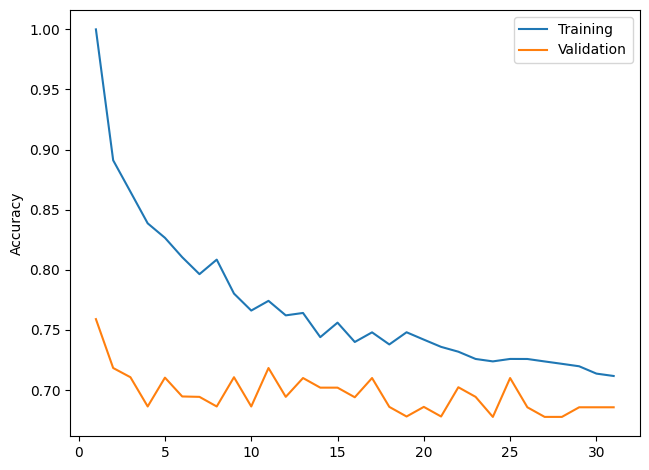

In [90]:
plt.plot(np.arange(1,32), KNNCV.cv_results_['mean_train_score'], label='Training')
plt.plot(np.arange(1,32), KNNCV.cv_results_['mean_test_score'], label='Validation')
plt.tight_layout()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
DT.fit(X_train,y_train)
KNN.fit(X_train,y_train)
MultiNB.fit(X_train,y_train)
GaussNB.fit(X_train,y_train)

GaussianNB()

In [91]:
print(DT.score(X_train,y_train), DT.score(X_test,y_test))
print(KNN.score(X_train,y_train), KNN.score(X_test,y_test))
print(MultiNB.score(X_train,y_train), MultiNB.score(X_test,y_test))
print(GaussNB.score(X_train,y_train), GaussNB.score(X_test,y_test))
print(KNNBest.score(X_train,y_train), KNNBest.score(X_test,y_test))

1.0 0.8148148148148148
1.0 0.8518518518518519
0.8467741935483871 0.8888888888888888
0.9758064516129032 1.0
1.0 0.8518518518518519


In [72]:
Bag = BaggingClassifier(KNN, n_estimators=10000)

In [73]:
Bag.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(metric='manhattan',
                                                 n_neighbors=1),
                  n_estimators=10000)

In [92]:
print(Bag.score(X_train,y_train), Bag.score(X_test,y_test))

1.0 0.8518518518518519


In [144]:
RF = RandomForestClassifier(n_estimators=200, criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [145]:
print(RF.score(X_train,y_train), RF.score(X_test,y_test))

1.0 1.0


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,RF.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
Boosting = AdaBoostClassifier(MultiNB, n_estimators=400, learning_rate=0.01)

In [133]:
Boosting.fit(X_train,y_train)

AdaBoostClassifier(estimator=MultinomialNB(), learning_rate=0.01,
                   n_estimators=400)

In [134]:
print(Boosting.score(X_train,y_train), Boosting.score(X_test,y_test))

0.9112903225806451 0.9444444444444444


In [136]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [158]:
svc = SVC(kernel='rbf', C=10)
LR = LogisticRegression(C=0.1, max_iter=3000)

In [159]:
from sklearn.ensemble import StackingClassifier

In [165]:
models = [('DT',DT),('SVC',svc),('LR',LR)]
stack = StackingClassifier(models,final_estimator=LogisticRegression(), cv=5)

In [168]:
stack.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('DT',
                                DecisionTreeClassifier(criterion='entropy')),
                               ('SVC', SVC(C=10)),
                               ('LR',
                                LogisticRegression(C=0.1, max_iter=3000))],
                   final_estimator=LogisticRegression())

In [169]:
print(stack.score(X_train,y_train), stack.score(X_test,y_test))

1.0 1.0
